# Bab 1 - Import Libraries

> Import seluruh library yang akan digunakan dalam project ini.

In [ ]:
# Dataframe and Data manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Feature selection
from scipy import stats
import phik

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# Save model
import pickle

# Untuk menghilangkan warning pada notebook
import warnings
warnings.filterwarnings("ignore")

# Bab 2 - Data Loading

Pertama saya akan load datasetnya terlebih dahulu. Lalu akan saya copy dataset asli agar data tidak terubah.

Sumber dataset bisa dilihat pada link berikut : [Workout & Fitness Tracker](https://www.kaggle.com/datasets/adilshamim8/workout-and-fitness-tracker-data)

In [2]:
# Load data
df_ori = pd.read_csv('workout_fitness_tracker_data.csv')

# Duplicate data
df = df_ori.copy()
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


Data sudah berhasil diload, lalu akan saya eksplorasi data sederhana.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [4]:
# cek missing value
df.isnull().sum().sum()

0

Data berisi 10000 baris dan 20 kolom. Tidak ada missing value pada dataset. Terdapat 5 kolom object dan 15 integer. Tidak ada categorical kolom yang sudah diencode. Nama tiap kolom belum sesuai dengan kaidah python atau masih terdapat whitespace, sehingga akan saya ubah nama kolom agar memudahkan dalam proses modeling selanjutnya.

In [5]:
# merubah nama kolom, mengganti spasi di nama kolom dengan under score
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['user_id', 'age', 'gender', 'height_(cm)', 'weight_(kg)',
       'workout_type', 'workout_duration_(mins)', 'calories_burned',
       'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'workout_intensity',
       'sleep_hours', 'water_intake_(liters)', 'daily_calories_intake',
       'resting_heart_rate_(bpm)', 'vo2_max', 'body_fat_(%)',
       'mood_before_workout', 'mood_after_workout'],
      dtype='object')

Nama kolom sudah berhasil dirubah. Selanjutnya saya cek apakah ada data yang terduplikat?

In [6]:
df.duplicated().sum()

0

Tidak ada data yang terduplikat di dataset ini. Selanjutnya saya akan cek central tendency dari numerical dataset.

In [7]:
# Cek statistik dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.0,5000.500000,2.886896e+03,1.0,2500.75,5000.50,7500.25,10000.0
age,10000.0,38.390100,1.217164e+01,18.0,28.00,38.00,49.00,59.0
height_(cm),10000.0,174.275100,1.444099e+01,150.0,162.00,174.00,187.00,199.0
weight_(kg),10000.0,84.903000,2.018994e+01,50.0,67.00,85.00,102.00,119.0
workout_duration_(mins),10000.0,64.464800,3.181495e+01,10.0,37.00,64.00,92.00,119.0
calories_burned,10000.0,552.100800,2.606299e+02,100.0,325.00,554.00,776.00,999.0
heart_rate_(bpm),10000.0,129.526700,2.887415e+01,80.0,105.00,130.00,155.00,179.0
steps_taken,10000.0,10455.496600,5.486424e+03,1000.0,5673.00,10434.50,15211.00,19998.0
distance_(km),10000.0,7.820745,4.159148e+00,0.5,4.24,7.85,11.41,15.0
sleep_hours,10000.0,6.982820,1.708738e+00,4.0,5.50,7.00,8.40,10.0


Diketahui bahwa:
- Age termuda yang melakukan fitness ada di 18 tahun dan tertua 59 tahun. Terlihat data age kemungkinan normal distribution.
- Rata" tinggi dan berat badan ada di 174 cm dan 84 kg. Kemungkinan data terdistribusi secara normal.
- Waktu terlama untuk workout ada pada 119 menit, atau sekitar 2 jam.

# Bab 3 - Exploratory Data Analysis (EDA)

>Saya akan membuat visualisasi dan melihat beberapa hubungan antar variable dengan pertanyaan" berikut:

## Pertanyaan 1
Berapakah usia user yang sering berolahraga?

In [8]:
df.age.value_counts().sort_values(ascending=False).head().reset_index()

,age,count
0,44,272
1,20,270
2,19,262
3,30,259
4,55,258


<Axes: ylabel='age'>

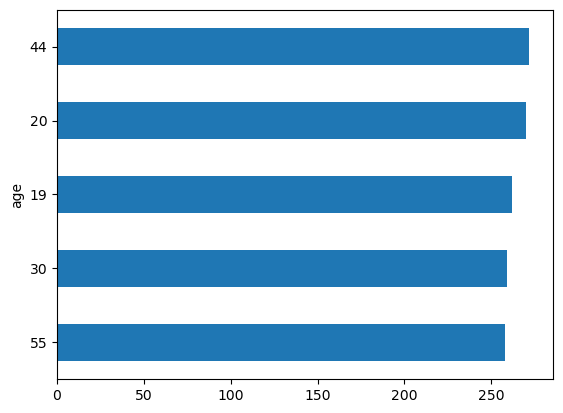

In [9]:
df.age.value_counts().sort_values().tail().plot(kind='barh')

Ternyata dilihat dari barchart, 5 usia teratas yang paling sering berolahraga cukup beragam mulai dari usia muda 19 sampai tertua 55 tahun. Usia paling sering berolahraga ada pada 44 tahun, ini menandakan adanya kesadaran pada orang dewasa akan kesehatan mereka pada usia yang sudah tidak muda lagi.

## Pertanyaan 2
wokout_type apa yang disukai oleh masing" gender?

In [10]:
df.groupby(['workout_type', 'gender']).size().sort_values(ascending=False).head(8).reset_index(name='count')

,workout_type,gender,count
0,HIIT,Male,650
1,Strength,Other,585
2,Cycling,Other,584
3,Cardio,Other,565
4,Yoga,Other,562
5,Cardio,Male,562
6,Yoga,Male,557
7,Cycling,Female,551


<Axes: ylabel='workout_type,gender'>

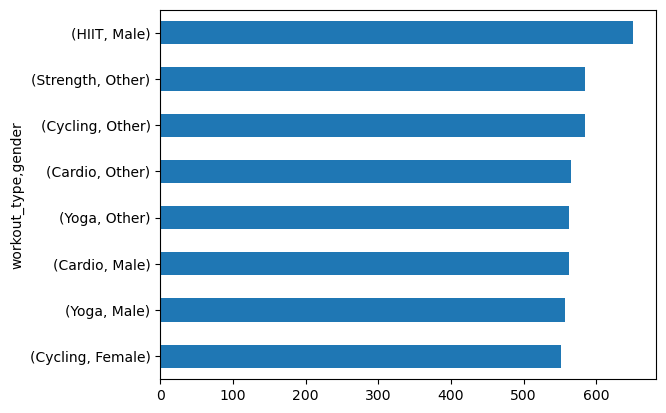

In [11]:
df.groupby(['workout_type', 'gender']).size().sort_values().tail(8).plot(kind='barh')

Diketahui bahwa Male lebih sering melakukan olahraga dibanding Other dan Female. Dimana tipe workout yang disukai oleh Male adalah HIIT, untuk Other adalah Strength dan Female menyukai Cycling. Dari sini saya bisa merekomendasikan untuk menawarkan produk olahraga yang berkaitan dengan tipe workout yang disukai pada masing" gender.

## Pertanyaan 3
Berapa rata" workout_duration_(mins) dari tiap workout_type?

In [12]:
df.groupby('workout_type')['workout_duration_(mins)'].mean().sort_values(ascending=False).reset_index()

,workout_type,workout_duration_(mins)
0,Cardio,65.516717
1,HIIT,64.608897
2,Cycling,64.600845
3,Yoga,64.120048
4,Running,63.982263
5,Strength,63.959808


<Axes: ylabel='workout_type'>

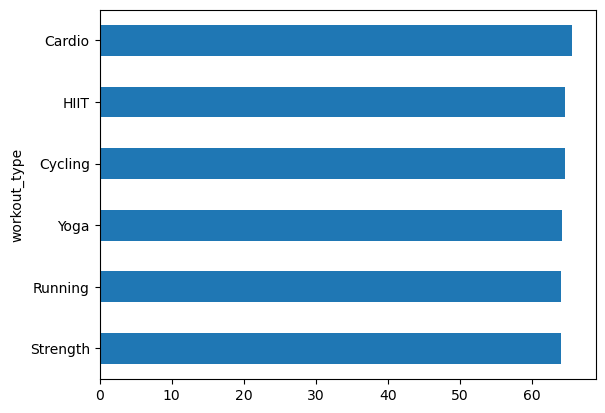

In [13]:
df.groupby('workout_type')['workout_duration_(mins)'].mean().sort_values().plot(kind='barh')

Secara keseluruhan semua tipe workout dilakukan rata" selama 60 menit atau 1 jam. Dari data ini bisa diambil untuk memperkirakan berapa lama rata" user akan berolahraga apabila melakukan olahraga di gym.

## Pertanyaan 4
Berapa rata" weight_(kg) dari masing" workout_type?

In [14]:
df.groupby('workout_type')['weight_(kg)'].mean().sort_values(ascending=False).reset_index()

,workout_type,weight_(kg)
0,HIIT,85.821490
1,Running,85.112538
2,Cycling,84.934179
3,Strength,84.911818
4,Cardio,84.413982
5,Yoga,84.186074


<Axes: ylabel='workout_type'>

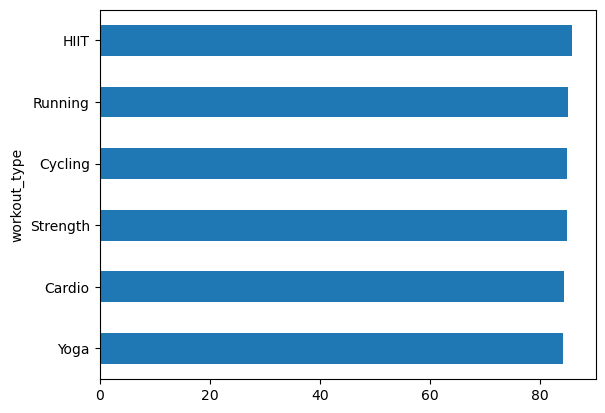

In [15]:
df.groupby('workout_type')['weight_(kg)'].mean().sort_values().plot(kind='barh')

Jika dibulatkan, masing" berat badan user yang berolahraga berada di kisaran 85kg. Data ini bisa digunakan untuk menentukan produk penjualan seperti besaran baju untuk orang dengan size berat badan 85 kg, atau memperkirakan kekuatan alat yang akan digunakan pada gym seperti sepeda untuk olahraga Cycling ataupun treadmil.

## Pertanyaan 5
Apakah ada perbedaan signifikan heart_rate_(bpm) antar ketegori workout_intensity?

Untuk menjawab pertanyaan ini saya akan menggunakan hipotesis testing ANOVA.

In [16]:
df['workout_intensity'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [17]:
#Extracting heart rate data for each category

high = df['heart_rate_(bpm)'][(df['workout_intensity']=='High')]
medium = df['heart_rate_(bpm)'][df['workout_intensity']=='Medium']
low = df['heart_rate_(bpm)'][df['workout_intensity']=='Low']

In [18]:
print(f'Average Heart Rate of High Group: {high.mean():.2f}')
print(f'Average Heart Rate of Medium Group: {medium.mean():.2f}')
print(f'Average Heart Rate of Low Group: {low.mean():.2f}')

Average Heart Rate of High Group: 129.76
Average Heart Rate of Medium Group: 129.59
Average Heart Rate of Low Group: 129.24


H0 : Tidak ada perbedaan signifikan diantara ketiga kategori  
H1 : Ada perbedaan signifikan diantara ketiga kategori

In [19]:
res = stats.f_oneway(high, medium, low)
print('P-value:',res.pvalue)

P-value: 0.7593894508868648


Ternyata H0 tidak dapat ditolak karena p-value > 0.05. Sehingga tidak ada perbedaan yang signifikan antara heart rate dan tipe workout. Sehingga tipe apapun yang dipilih user seharusnya tidak terlalu mempengaruhi besaran heart rate.

## Pertanyaan 6
Apakah terdapat pola antara pengaruh workout_duration_(mins) dengan calories_burned?

Saya akan menggunakan teknik korelasi spearman dan juga menampilkan visualisasinya untuk melihat hubungan kedua variable tersebut.

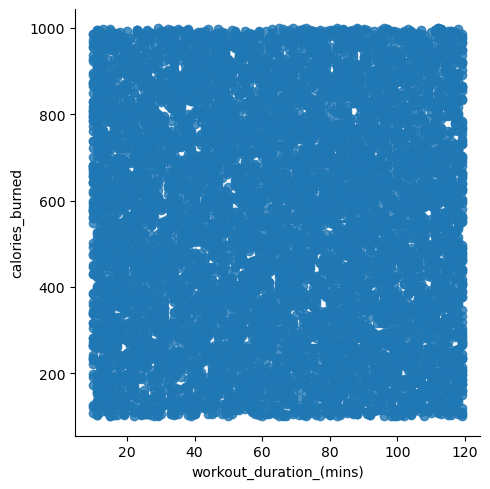

In [20]:
sns.lmplot(data=df,x='workout_duration_(mins)', y='calories_burned')

In [21]:
print(f"rho-correlation workout_duration_(mins) dan calories_burned: {df['workout_duration_(mins)'].corr(df['calories_burned'], method='spearman'):.2f}")

rho-correlation workout_duration_(mins) dan calories_burned: -0.01


Jika kita dari hasil nilai korelasi, nilai korelasi sebesar -0.01. Maka tidak terdapat korelasi antara workout duration dan calories burned.

## Pertanyaan 7
Apakah ada hubungan diantara variable workout_type dan workout_intensity?

Saya akan menggunakan hipotesis testing Chi-Squared Test untuk menjawab pertanyaan ini.

In [22]:
#Contingency Table
contingency_table = pd.crosstab(df['workout_type'],df['workout_intensity'])
contingency_table

workout_intensity,High,Low,Medium
workout_type,,,
Cardio,558,566,521
Cycling,545,534,577
HIIT,545,590,596
Running,541,559,535
Strength,581,577,509
Yoga,550,531,585


H0 : Tidak ada hubungan antara workout_type dan workout_intensity  
H1 : Terdapat hubungan antara workout_type dan workout_intensity

In [23]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.11379547254332689


Didapatkan hasil p-value > 0.05 sehingga H0 tidak dapat ditolak, jadi tidak ada hubungan antara workout_type dan workout_intensity. Jadi intensitas setiap tipe workout seharusnya tidak jauh berbeda.

# Bab 5 - Feature Engineering

## Split between X dan y

In [24]:
X = df.drop(['calories_burned'],axis=1) # mengambil data selain kolom calories_burned
y = df.calories_burned # mengambil data kolom calories_burned
y

0       384
1       612
2       540
3       672
4       410
       ... 
9995    230
9996    539
9997    886
9998    447
9999    978
Name: calories_burned, Length: 10000, dtype: int64

In [25]:
X

,user_id,age,gender,height_(cm),weight_(kg),workout_type,workout_duration_(mins),heart_rate_(bpm),steps_taken,distance_(km),workout_intensity,sleep_hours,water_intake_(liters),daily_calories_intake,resting_heart_rate_(bpm),vo2_max,body_fat_(%),mood_before_workout,mood_after_workout
0,1,39,Male,175,99,Cycling,79,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


## Split between numerical and Categorical column

In [26]:
X.columns

Index(['user_id', 'age', 'gender', 'height_(cm)', 'weight_(kg)',
       'workout_type', 'workout_duration_(mins)', 'heart_rate_(bpm)',
       'steps_taken', 'distance_(km)', 'workout_intensity', 'sleep_hours',
       'water_intake_(liters)', 'daily_calories_intake',
       'resting_heart_rate_(bpm)', 'vo2_max', 'body_fat_(%)',
       'mood_before_workout', 'mood_after_workout'],
      dtype='object')

In [27]:
# myimpanpan nama kolom yang numerik data
num_col = ['age', 'height_(cm)', 'weight_(kg)','workout_duration_(mins)',
           'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'sleep_hours',
           'water_intake_(liters)', 'daily_calories_intake', 'resting_heart_rate_(bpm)',
           'vo2_max', 'body_fat_(%)']
# menyimpan nama kolom yang kategorikal data
cat_col = ['gender', 'workout_type', 'workout_intensity', 'mood_before_workout', 'mood_after_workout']

## Cardinality handling

In [28]:
# perulangan di dalam kolom kategori
for i in cat_col:
    print(f'Jumlah unique value dari kolom {i} : {X[i].nunique()}') # menghitung data yg unik dari kolom kategori
    print(f'Unique value dari kolom {i} : {X[i].unique()}') # menampilkan data kategori yang unik
    print('')

Jumlah unique value dari kolom gender : 3
Unique value dari kolom gender : ['Male' 'Other' 'Female']

Jumlah unique value dari kolom workout_type : 6
Unique value dari kolom workout_type : ['Cycling' 'Cardio' 'HIIT' 'Strength' 'Yoga' 'Running']

Jumlah unique value dari kolom workout_intensity : 3
Unique value dari kolom workout_intensity : ['High' 'Medium' 'Low']

Jumlah unique value dari kolom mood_before_workout : 4
Unique value dari kolom mood_before_workout : ['Tired' 'Happy' 'Neutral' 'Stressed']

Jumlah unique value dari kolom mood_after_workout : 3
Unique value dari kolom mood_after_workout : ['Fatigued' 'Energized' 'Neutral']



Setiap feature telah termasuk low cardinality, saya lanjut ke train test split

## Split between Train set and Test set

Karena dataset berjumlah cukup besar saya akan mengambil 90 % dataset menjadi data train. Sehingga ada 1000 data test.

In [29]:
#Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 27)
print('Train Size: ', X_train.shape) # menampilkan dimensi data
print('Test Size: ', X_test.shape) # menampilkan dimensi data

Train Size:  (9000, 19)
Test Size:  (1000, 19)


## Handle Outlier

Kita lihat nilai skewness untuk numerical columns nya

In [30]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

In [31]:
skewness_results = check_skewness(X_train, 'age', 'height_(cm)', 'weight_(kg)','workout_duration_(mins)',
           'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'sleep_hours',
           'water_intake_(liters)', 'daily_calories_intake', 'resting_heart_rate_(bpm)',
           'vo2_max', 'body_fat_(%)')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

age: 0.00433410584300723
height_(cm): 0.021645663278053784
weight_(kg): -0.020526147124822595
workout_duration_(mins): 0.0006169547277420722
heart_rate_(bpm): -0.010851456871899335
steps_taken: 0.007679902668763606
distance_(km): -0.009578276387529937
sleep_hours: 0.014837966623513077
water_intake_(liters): 0.0
daily_calories_intake: -0.006503874427906617
resting_heart_rate_(bpm): 0.005105728427300504
vo2_max: 0.0
body_fat_(%): 0.0


Kita klasifikasi tiap kolomnya termasuk kedalam normal/skew/extreme skew distribution menggunakan looping

In [32]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: # sama aja dgn -0.5 <= skewness <= 0.5
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['age', 'height_(cm)', 'weight_(kg)', 'workout_duration_(mins)', 'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'sleep_hours', 'water_intake_(liters)', 'daily_calories_intake', 'resting_heart_rate_(bpm)', 'vo2_max', 'body_fat_(%)']
Skewed: []
Extreme Skewed: []


Semua kolom termasuk normal distribusi, kita coba cek outliernya dengan menggunakan function.

In [33]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df, columns):
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100 # perhitungan persentase outlier

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_normal(X_train, normal_columns))

Percentage of outliers in age: 0.00%
Percentage of outliers in height_(cm): 0.00%
Percentage of outliers in weight_(kg): 0.00%
Percentage of outliers in workout_duration_(mins): 0.00%
Percentage of outliers in heart_rate_(bpm): 0.00%
Percentage of outliers in steps_taken: 0.00%
Percentage of outliers in distance_(km): 0.00%
Percentage of outliers in sleep_hours: 0.00%
Percentage of outliers in water_intake_(liters): 0.00%
Percentage of outliers in daily_calories_intake: 0.00%
Percentage of outliers in resting_heart_rate_(bpm): 0.00%
Percentage of outliers in vo2_max: 0.00%
Percentage of outliers in body_fat_(%): 0.00%
None


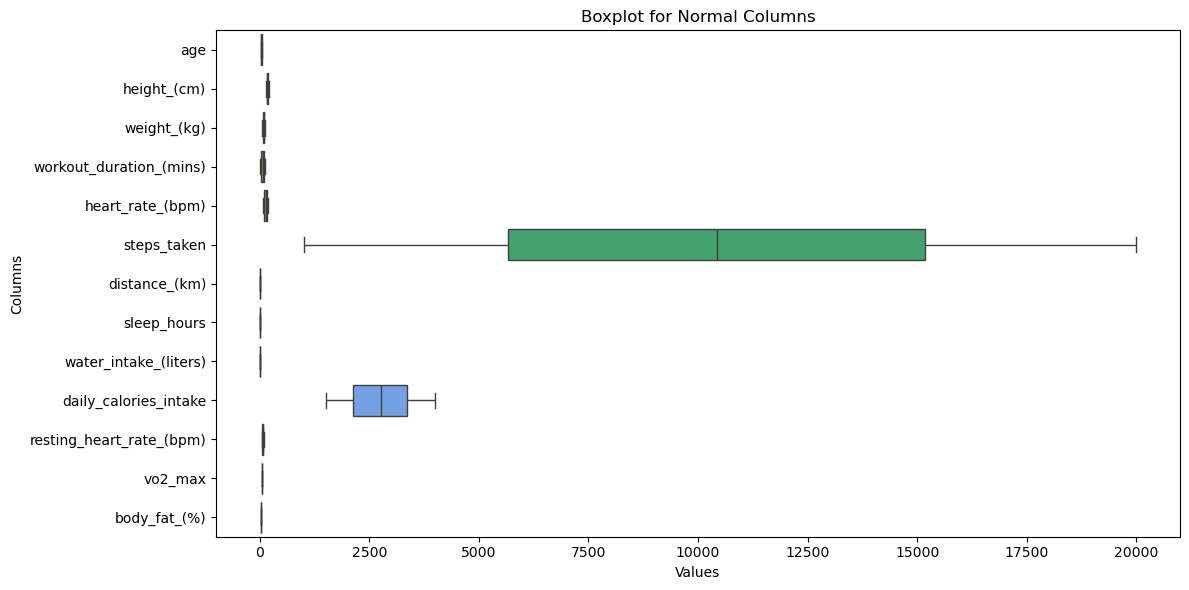

In [34]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(figsize=(12, 6)) # menampilkan grafik 1 baris 2 kolom

# Boxplot for normal columns
sns.boxplot(data=X_train[normal_columns], orient="h")
axes.set_title("Boxplot for Normal Columns")
axes.set_xlabel("Values")
axes.set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

Tidak adanya outlier pada dataset, selanjutnya saya akan melakukan feature selection

## Feature Selection

Dalam feature selection saya akan menggabungkan X_train dan y_train untuk melihat korelasi antara kolom feature dan target. Setelah melihat nilainya saya akan mempertimbangkan untuk drop kolom feature yang tidak berkorelasi dengan kolom target.

In [35]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1) #menggabungkan data X_train dan y_train

# Show X_train
concat_train.head()

,user_id,age,gender,height_(cm),weight_(kg),workout_type,workout_duration_(mins),heart_rate_(bpm),steps_taken,distance_(km),workout_intensity,sleep_hours,water_intake_(liters),daily_calories_intake,resting_heart_rate_(bpm),vo2_max,body_fat_(%),mood_before_workout,mood_after_workout,calories_burned
9928,9929,27,Male,184,94,Yoga,85,159,19518,5.43,Medium,6.7,1.9,1930,70,38.4,28.5,Stressed,Neutral,192
9361,9362,24,Other,175,67,Cycling,28,146,10108,8.15,Medium,6.7,1.9,2298,65,38.4,28.5,Stressed,Fatigued,561
270,271,47,Female,156,113,Yoga,109,142,6079,8.48,High,9.0,1.9,1992,57,38.4,28.5,Stressed,Fatigued,433
1125,1126,32,Female,187,105,Running,32,160,1296,3.52,Low,4.5,1.9,2480,82,38.4,28.5,Neutral,Energized,902
321,322,56,Female,166,119,Cycling,77,135,15972,3.50,High,6.1,1.9,2814,78,38.4,28.5,Tired,Fatigued,577


In [36]:
concat_train.columns # melihat kolom di concat_train

Index(['user_id', 'age', 'gender', 'height_(cm)', 'weight_(kg)',
       'workout_type', 'workout_duration_(mins)', 'heart_rate_(bpm)',
       'steps_taken', 'distance_(km)', 'workout_intensity', 'sleep_hours',
       'water_intake_(liters)', 'daily_calories_intake',
       'resting_heart_rate_(bpm)', 'vo2_max', 'body_fat_(%)',
       'mood_before_workout', 'mood_after_workout', 'calories_burned'],
      dtype='object')

In [37]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['age', 'height_(cm)', 'weight_(kg)','workout_duration_(mins)',
           'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'sleep_hours',
           'water_intake_(liters)', 'daily_calories_intake', 'resting_heart_rate_(bpm)',
           'vo2_max', 'body_fat_(%)', 'calories_burned']
target = ['calories_burned']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns, target)

# Print result
print(correlation)

interval columns not set, guessing: ['age', 'height_(cm)', 'weight_(kg)', 'workout_duration_(mins)', 'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'sleep_hours', 'water_intake_(liters)', 'daily_calories_intake', 'resting_heart_rate_(bpm)', 'vo2_max', 'body_fat_(%)', 'calories_burned']
                          calories_burned
age                              0.053404
height_(cm)                      0.000000
weight_(kg)                      0.018794
workout_duration_(mins)          0.000000
heart_rate_(bpm)                 0.000000
steps_taken                      0.049515
distance_(km)                    0.000000
sleep_hours                      0.000000
daily_calories_intake            0.047021
resting_heart_rate_(bpm)         0.031131
calories_burned                  1.000000


Jika kita lihat dari hasil nilai `Phi-K` corr, terdapat banyak kolom feature yang `tidak berkorelasi`. Dari hasil data ini ada kolom height_(cm), workout_duration_(mins), heart_rate_(bpm), distance_(km), dan sleep_hours. Menurut `domain knowledge` saya kolom-kolom terutama workout_duration_(mins) dan distance_(km) seharusnya berpengaruh terhadap pembakaran kalori selama workout, sehingga saya akan mencoba mengganti teknik korelasi menggunakan `Spearman`.

In [38]:
# Create function to correlate variables with default
def compute_spearman_correlation(dataframe, columns, target):
    subset = dataframe[columns]
    correlation_matrix = subset.corr(method='spearman')
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['age', 'height_(cm)', 'weight_(kg)','workout_duration_(mins)',
           'heart_rate_(bpm)', 'steps_taken', 'distance_(km)', 'sleep_hours',
           'water_intake_(liters)', 'daily_calories_intake', 'resting_heart_rate_(bpm)',
           'vo2_max', 'body_fat_(%)', 'calories_burned']
target = ['calories_burned']

# Compute spearman correlation for each set of columns and print
correlation = compute_spearman_correlation(concat_train, columns, target)

# Print result
print(correlation)

                          calories_burned
age                              0.013007
height_(cm)                     -0.000935
weight_(kg)                     -0.025890
workout_duration_(mins)         -0.003211
heart_rate_(bpm)                -0.002252
steps_taken                      0.003028
distance_(km)                    0.009103
sleep_hours                      0.005029
water_intake_(liters)                 NaN
daily_calories_intake            0.007986
resting_heart_rate_(bpm)         0.003682
vo2_max                               NaN
body_fat_(%)                          NaN
calories_burned                  1.000000


Setelah menggunakan teknik korelasi spearman, tidak ada korelasi yang bernilai 0. Sehingga saya tidak akan drop kolom" tadi. Namun terdapat 3 kolom yang menghasilkan nilai `NaN` saya akan cek kolom" tersebut.

In [39]:
print(concat_train[['water_intake_(liters)', 'vo2_max', 'body_fat_(%)']].nunique())

water_intake_(liters)    1
vo2_max                  1
body_fat_(%)             1
dtype: int64


Terlihat setelah saya cek unique value dari tiap kolom tersebut, keseluruhan data dari kolom tersebut sama sehingga data tidak memiliki informasi yang berguna untuk memprediksi nantinya. Saya memutuskan untuk drop kolom 'water_intake_(liters)', 'vo2_max', 'body_fat_(%)'. Untuk lebih meyakinkan dalam drop data tersebut daya akan memberikan referensi data untuk setiap kolom tersebut:
- [Kebutuhan Air Tiap Hari](https://madeblue.org/en/how-much-water-should-you-drink-per-day/)
- [Nilai VO2 Max](https://www.siloamhospitals.com/informasi-siloam/artikel/mengenal-vo2-max)
- [Body Fat](https://www.siloamhospitals.com/informasi-siloam/artikel/mengenal-persentase-lemak-tubuh)

Untuk categorical column saya akan drop column mood_after_workout. Karena asumsi saya pembakaran kalori sudah terjadi ketika user ingin mengisi feature ini. 

In [40]:
#Drop column that NaN
X_train.drop(['user_id', 'water_intake_(liters)', 'vo2_max', 'body_fat_(%)', 'mood_after_workout'], axis = 1, inplace = True)
X_test.drop(['user_id', 'water_intake_(liters)', 'vo2_max', 'body_fat_(%)', 'mood_after_workout'], axis = 1, inplace=True)

In [41]:
# Show columns
print(X_train.columns)
print(X_test.columns)

Index(['age', 'gender', 'height_(cm)', 'weight_(kg)', 'workout_type',
       'workout_duration_(mins)', 'heart_rate_(bpm)', 'steps_taken',
       'distance_(km)', 'workout_intensity', 'sleep_hours',
       'daily_calories_intake', 'resting_heart_rate_(bpm)',
       'mood_before_workout'],
      dtype='object')
Index(['age', 'gender', 'height_(cm)', 'weight_(kg)', 'workout_type',
       'workout_duration_(mins)', 'heart_rate_(bpm)', 'steps_taken',
       'distance_(km)', 'workout_intensity', 'sleep_hours',
       'daily_calories_intake', 'resting_heart_rate_(bpm)',
       'mood_before_workout'],
      dtype='object')


## Split num col cat col

In [42]:
# split num col cat col
num_columns = ['age', 'height_(cm)', 'weight_(kg)', 'workout_duration_(mins)', 'heart_rate_(bpm)', 
               'steps_taken', 'distance_(km)',  'sleep_hours', 'daily_calories_intake', 'resting_heart_rate_(bpm)']
cat_ordinal = ['workout_intensity']
cat_nominal = ['gender', 'workout_type', 'mood_before_workout']

Selanjutnya saya akan scaling menggunakan `StandardScaler` karena semua numerical column terdistribusi normal. Untuk categorical column saya akan menggunakan `OneHotEncoder` untuk categori yang bersifat nominal dan `OrdinalEncoder` untuk categorical ordinal.

## Preprocessing Pipeline

In [43]:
# Feature scaling using standard scaler
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False) # sparse_output(atau sparse aja)=False utk mengganti -> `.toarray()`
orde = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

preprocess = ColumnTransformer(
    transformers = [
        ('num',scaler,num_columns),
        ('cat_nom',ohe,cat_nominal),
        ('cat_ord',orde,cat_ordinal)],
    remainder='passthrough' # untuk categorical yg sdh di encode
)

preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'height_(cm)', 'weight_(kg)',
                                  'workout_duration_(mins)', 'heart_rate_(bpm)',
                                  'steps_taken', 'distance_(km)', 'sleep_hours',
                                  'daily_calories_intake',
                                  'resting_heart_rate_(bpm)']),
                                ('cat_nom',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender', 'workout_type',
                                  'mood_before_workout']),
                                ('cat_ord',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High']]),
                                 ['workout_intensity'])])

Scaling dan Encoding sudah selesai dibuat, selanjutnya saya akan lanjut ke model definition dengan menggunakan pipeline yang berisikan ColumnTransformer yang sudah saya buat.

In [44]:
# Model Definition using pipeline
pipe_knn = make_pipeline(preprocess,KNeighborsRegressor())
pipe_svr = make_pipeline(preprocess,SVR())
pipe_dt = make_pipeline(preprocess,DecisionTreeRegressor(random_state=27))
pipe_rf = make_pipeline(preprocess,RandomForestRegressor(random_state=27))
pipe_ada = make_pipeline(preprocess,AdaBoostRegressor())

# Bab 6 - Model Definition

Karena model ini akan digunakan untuk kegiatan sehari-hari, maka model akan menggunakan metrics evaluation Mean Absolute Error (MAE), dimana MAE ini mudah dipahami dan tidak terlalu sensitif terhadap outlier.

## K-Nearest Neighbors (KNN Regressor)

### Penjelasan:
- Model memprediksi nilai target berdasarkan rata-rata dari K tetangga terdekat.
- Tidak ada proses pelatihan eksplisit, hanya menyimpan data.

### Hyperparameter Utama:
- n_neighbors: Jumlah tetangga terdekat yang digunakan untuk prediksi.
- weights: Cara menghitung kontribusi tetangga (uniform atau distance).
- metric: Metode pengukuran jarak (default: 'minkowski', sering dipakai: 'euclidean').

### Metrik Evaluasi:
- MAE
- RMSE
- R²

## Support Vector Machine (SVM Regressor/SVR)

### Penjelasan:
- Mencari hyperplane yang memprediksi dalam toleransi error (ε-insensitive).
- Cocok untuk data dengan noise kecil atau distribusi halus.

### Hyperparameter Utama:
- kernel: Jenis kernel ('linear', 'poly', 'rbf', 'sigmoid').
- C: Regularisasi; semakin besar, model lebih fokus meminimalkan error.
- epsilon: Toleransi error tanpa penalti.
- gamma: Kontrol kompleksitas model (hanya untuk kernel non-linear).

### Metrik Evaluasi:
- MAE
- RMSE
- R²

## Decision Tree Regressor

### Penjelasan:
- Membagi data berdasarkan fitur secara rekursif sampai mencapai nilai target yang stabil.
- Mudah ditafsirkan, tapi rawan overfitting.

### Hyperparameter Utama:
- max_depth: Kedalaman maksimum pohon.
- min_samples_split: Minimum sampel untuk membagi node.
- min_samples_leaf: Minimum sampel di daun (leaf).
- max_features: Fitur yang digunakan saat split.

### Metrik Evaluasi:
- MAE
- RMSE
- R²

## Random Forest Regressor

### Penjelasan:
- Ensembel dari banyak pohon keputusan yang dilatih secara acak.
- Lebih stabil dan akurat dari pohon tunggal.

### Hyperparameter Utama:
- n_estimators: Jumlah pohon dalam hutan.
- max_depth: Kedalaman maksimal tiap pohon.
- min_samples_split, min_samples_leaf: Kontrol pemisahan data.
- max_features: Jumlah fitur yang dipertimbangkan saat split.

### Metrik Evaluasi:
- MAE
- RMSE
- R²

## AdaBoost Regressor

### Penjelasan:
- Ensembel berbobot dari model-model lemah (biasanya stump/pohon pendek).
- Meningkatkan model bertahap dengan memberi fokus lebih ke data yang salah prediksi.

### Hyperparameter Utama:
- n_estimators: Jumlah model yang digabung.

- learning_rate: Kontrol kontribusi tiap model lemah.

- loss: Fungsi error yang digunakan ('linear', 'square', 'exponential').

### Metrik Evaluasi:
- MAE
- RMSE
- R²

# Bab 7 - Model Training

## K-Nearest Neighbors (KNN Regressor)

In [45]:
# Fit model terhadap data train
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_(cm)',
                                                   'weight_(kg)',
                                                   'workout_duration_(mins)',
                                                   'heart_rate_(bpm)',
                                                   'steps_taken',
                                                   'distance_(km)',
                                                   'sleep_hours',
                                                   'daily_calories_intake',
                                                   'resting_heart_rate_(bpm)']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workout_type',
                                                   'mood_before_workout']),
                                                 ('cat_ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['workout_intensity'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [46]:
# melakukan predict pada target data train
y_pred_train_knn = pipe_knn.predict(X_train)

# melakukan predict pada target data test
y_pred_test_knn = pipe_knn.predict(X_test)

## Support Vector Machine (SVM Regressor/SVR)

In [47]:
# Fit model terhadap data train
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_(cm)',
                                                   'weight_(kg)',
                                                   'workout_duration_(mins)',
                                                   'heart_rate_(bpm)',
                                                   'steps_taken',
                                                   'distance_(km)',
                                                   'sleep_hours',
                                                   'daily_calories_intake',
                                                   'resting_heart_rate_(bpm)']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workout_type',
                                                   'mood_before_workout']),
                                                 ('cat_ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['workout_intensity'])])),
                ('svr', SVR())])

In [48]:
# melakukan predict pada target data train
y_pred_train_svr = pipe_svr.predict(X_train)

# melakukan predict pada target data test
y_pred_test_svr = pipe_svr.predict(X_test)

## Decision Tree Regressor

In [49]:
# Fit model terhadap data train
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_(cm)',
                                                   'weight_(kg)',
                                                   'workout_duration_(mins)',
                                                   'heart_rate_(bpm)',
                                                   'steps_taken',
                                                   'distance_(km)',
                                                   'sleep_hours',
                                                   'daily_calories_intake',
                                                   'resting_heart_rate_(bpm)']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workout_type',
                                                   'mood_before_workout']),
                                                 ('cat_ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['workout_intensity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=27))])

In [50]:
# melakukan predict pada target data train
y_pred_train_dt = pipe_dt.predict(X_train)

# melakukan predict pada target data test
y_pred_test_dt = pipe_dt.predict(X_test)

## Random Forest Regressor

In [51]:
# Fit model terhadap data train
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_(cm)',
                                                   'weight_(kg)',
                                                   'workout_duration_(mins)',
                                                   'heart_rate_(bpm)',
                                                   'steps_taken',
                                                   'distance_(km)',
                                                   'sleep_hours',
                                                   'daily_calories_intake',
                                                   'resting_heart_rate_(bpm)']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workout_type',
                                                   'mood_before_workout']),
                                                 ('cat_ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['workout_intensity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=27))])

In [52]:
# melakukan predict pada target data train
y_pred_train_rf = pipe_rf.predict(X_train)

# melakukan predict pada target data test
y_pred_test_rf = pipe_rf.predict(X_test)

## AdaBoost Regressor

In [53]:
# Fit model terhadap data train
pipe_ada.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_(cm)',
                                                   'weight_(kg)',
                                                   'workout_duration_(mins)',
                                                   'heart_rate_(bpm)',
                                                   'steps_taken',
                                                   'distance_(km)',
                                                   'sleep_hours',
                                                   'daily_calories_intake',
                                                   'resting_heart_rate_(bpm)']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workout_type',
                                                   'mood_before_workout']),
                                                 ('cat_ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['workout_intensity'])])),
                ('adaboostregressor', AdaBoostRegressor())])

In [54]:
# melakukan predict pada target data train
y_pred_train_ada = pipe_ada.predict(X_train)

# melakukan predict pada target data test
y_pred_test_ada = pipe_ada.predict(X_test)

# Bab 8 - Model Evaluation

## Mean Absolute Error

Pada metrics perhitungan score, disini saya akan menggunakan Mean Absolute Error sebagai metricsnya. Alasannya karena hasil perhitungan prediksi untuk pembakaran kalori tidak terlalu ketat untuk hasil perhitungannya. Karena jika hasil yang keluar tidak sesuai data aktual, ini tidak terlalu berpengaruh terhadap user karena setelah berolahraga user tetap sehat. MAE juga dipakai agar lebih mudah menjelaskan kepada stakeholder.

In [55]:
# Dictionary berisi nama model dan hasil classification_report untuk train dan test
mae_reports = {
    'KNeighborsRegressor': {'train': mean_absolute_error(y_train, y_pred_train_knn),
            'test': mean_absolute_error(y_test, y_pred_test_knn)},
    'SupportVectorRegression': {'train': mean_absolute_error(y_train, y_pred_train_svr),
            'test': mean_absolute_error(y_test, y_pred_test_svr)},
    'DecisionTreeRegressor': {'train': mean_absolute_error(y_train, y_pred_train_dt),
                      'test': mean_absolute_error(y_test, y_pred_test_dt)},
    'RandomForestRegressor': {'train': mean_absolute_error(y_train, y_pred_train_rf),
                      'test': mean_absolute_error(y_test, y_pred_test_rf)},
    'AdaBoostRegressor': {'train': mean_absolute_error(y_train, y_pred_train_ada),
                'test': mean_absolute_error(y_test, y_pred_test_ada)}
}

mae_metrics = pd.DataFrame().from_dict(mae_reports, orient='index')

# Rename kolom agar lebih rapi
mae_metrics.columns = ['MAE Train', 'MAE Test']

mae_metrics

,MAE Train,MAE Test
KNeighborsRegressor,196.742111,242.463000
SupportVectorRegression,225.377438,224.537207
DecisionTreeRegressor,0.000000,301.434000
RandomForestRegressor,84.309663,226.074840
AdaBoostRegressor,225.799371,225.142165


**Insight per model:**
- Model KNeighborsRegressor:
Nilai MAE pada model KNeighborsRegressor untuk data Train (196.74) untuk data Test (242.46) ini menunjukkan bahwa model cenderung `overfitting` dimana model bagus memprediksi pada data training namun lebih jelek memprediksi pada data test.
    
- Model SVR:
Nilai MAE pada model SVR untuk data Train (225.37) untuk data Test (224.53) ini menunjukkan bahwa model termasuk `goodfit` karena model mampu memprediksi kedua data train dan test dengan tingkat error yan hampir sama.

- Model DecisionTreeRegressor:
Nilai MAE pada model DecisionTreeRegressor untuk data Train (0.00) untuk data Test (301.4) ini sangat jelas menunjukkan bahwa model mengalami `overfitting` dimana model mampu memprediksi dengan sempurna pada data train namun jelek sekali dalam memprediksi data test.

- Model RandomForestRegressor:
Nilai MAE pada model RandomForestRegressor untuk data Train (84.30) untuk data Test (226.07) ini menunjukkan bahwa model cenderung `overfitting` dimana model bagus memprediksi pada data training namun lebih jelek memprediksi pada data test.

- Model AdaBoostRegressor:
Nilai MAE pada model AdaBoostRegressor untuk data Train (225.83) untuk data Test (224.78) mirip seperti model SVR, model ini menunjukkan `goodfit` karena model mampu memprediksi kedua data train dan test dengan tingkat error yang hampir sama.

**Secara keseluruhan:**  
Model SVR dan AdaBoostRegressor merupakan model yang termasuk goodfit karena mampu memprediksi data train dan test dengan error yang hampir sama, namun untuk model lainnya cenderung mengalami overfitting.

## Check QQ Plot of Residuals

In [56]:
# Membuat residual untuk ditampilkan
y_test_res_knn = y_test - y_pred_test_knn
y_test_res_svr = y_test - y_pred_test_svr
y_test_res_dt = y_test - y_pred_test_dt
y_test_res_rf = y_test - y_pred_test_rf
y_test_res_ada = y_test - y_pred_test_ada

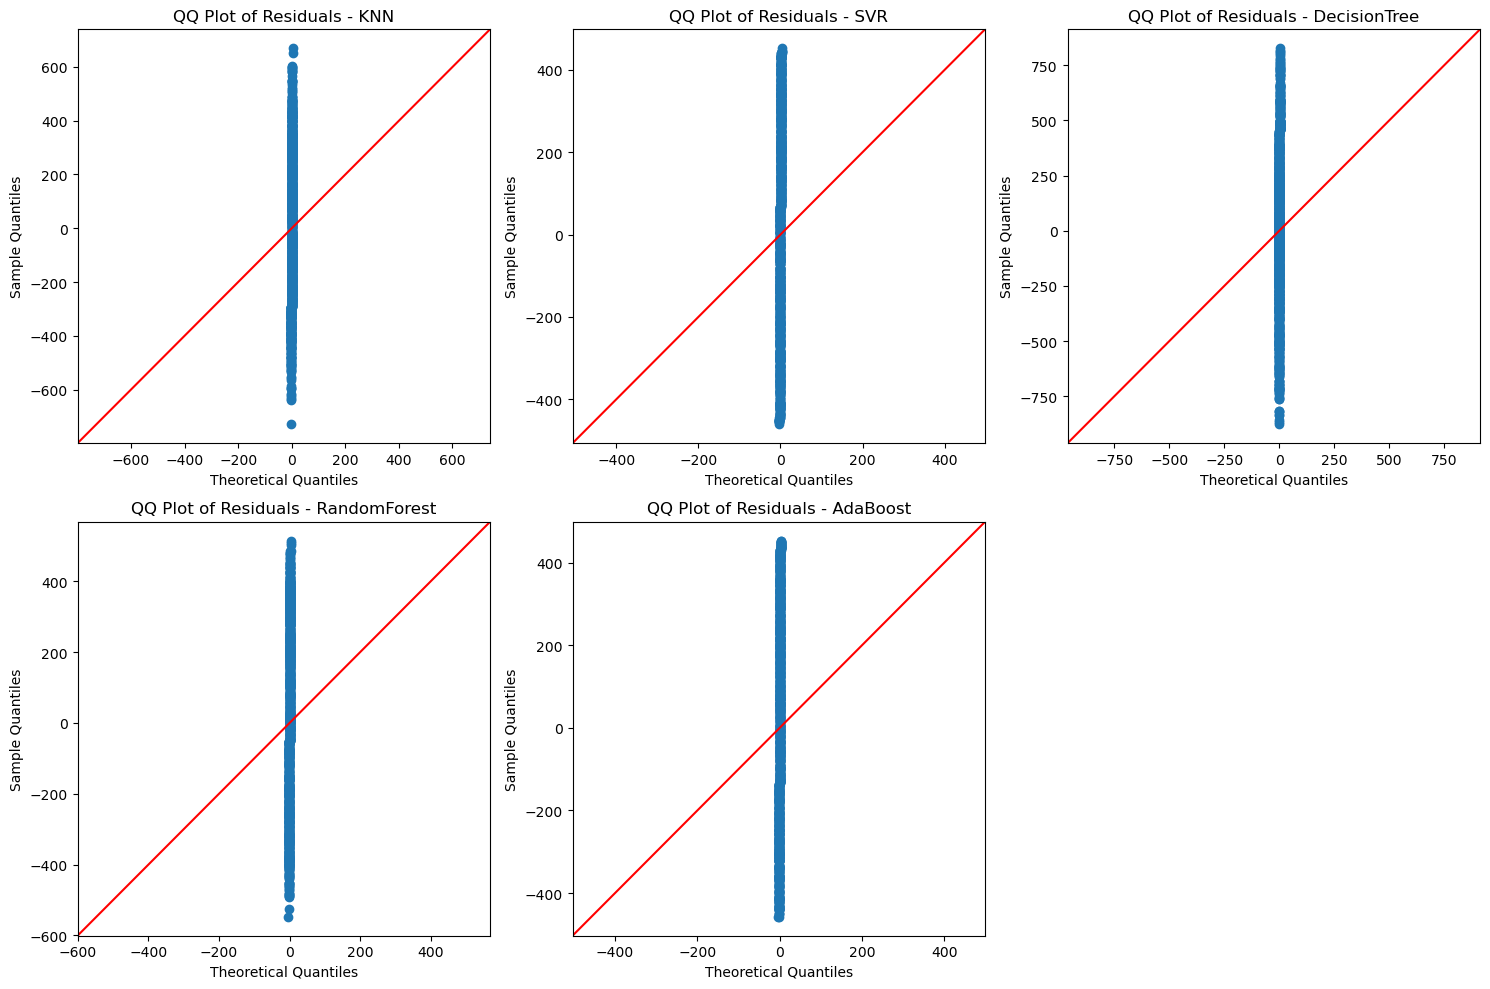

In [57]:
residuals = [('KNN', y_test_res_knn),
            ('SVR', y_test_res_svr),
            ('DecisionTree', y_test_res_dt),
            ('RandomForest', y_test_res_rf),
            ('AdaBoost', y_test_res_ada)
]

fig, axes = plt.subplots(2,3, figsize=(15, 10))

axes = axes.flatten()

for idx, (name, res) in enumerate(residuals):
    # Display QQ plot
    sm.qqplot(res, line ='45', ax=axes[idx])
    axes[idx].set_title(f'QQ Plot of Residuals - {name}')

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

**Insight:**  
Dari keseluruhan hasil QQ plot didapatkan pola vertikal yang terkonsentrasi disekitar 0. Dari gambar ini didapatkan informasi bahwa variasi residual sangat kecil. Ini menandakan dalam model kurangnya variasi pada prediksi atau masalah pada data.

## Check Homoscedasticity

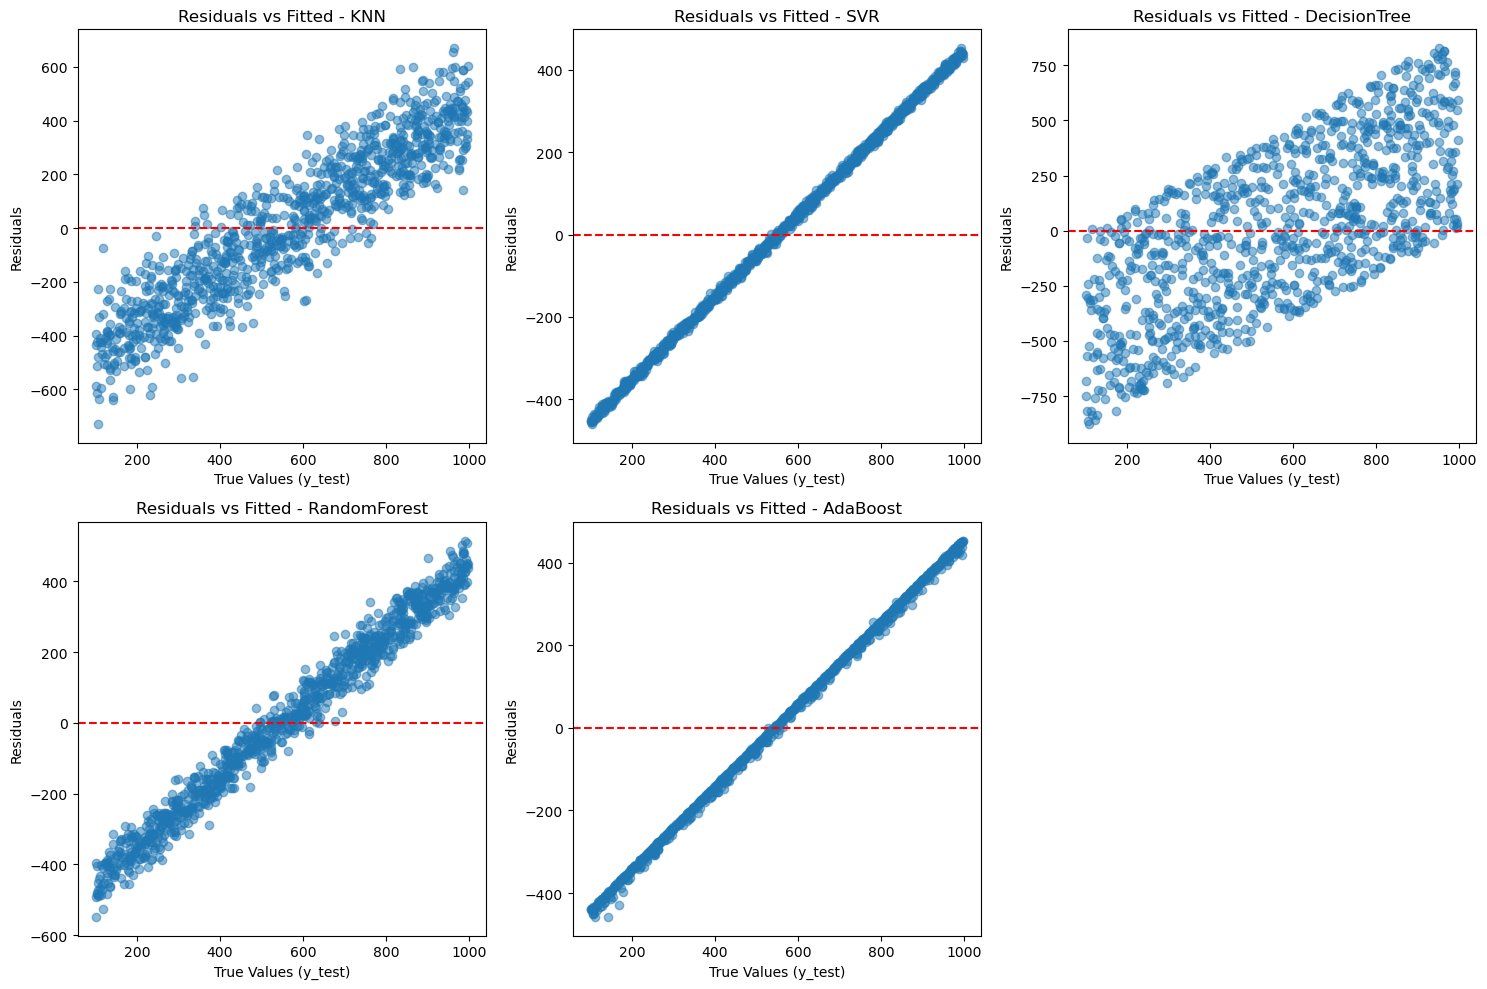

In [58]:
residuals = [('KNN', y_test_res_knn),
            ('SVR', y_test_res_svr),
            ('DecisionTree', y_test_res_dt),
            ('RandomForest', y_test_res_rf),
            ('AdaBoost', y_test_res_ada)
]

fig, axes = plt.subplots(2,3, figsize=(15, 10))

axes = axes.flatten()

for idx, (name, res) in enumerate(residuals):
    # Display scatter plot untuk homoskedastisitas
    axes[idx].scatter(y_test, res, alpha=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--')  # Garis horizontal di y=0
    axes[idx].set_title(f'Residuals vs Fitted - {name}')
    axes[idx].set_xlabel('True Values (y_test)')
    axes[idx].set_ylabel('Residuals')

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

**Insight:**
- KNN :  
Pola residual terlihat menyebar dari kiri bawah ke kanan atas, pada model ini terjadi heteroskedastisitas dimana varians meningkat seiring naiknya nilai target sebenarnya.
- SVR :  
Pola residual membentuk garis lurus diagonal, pola ini menunjukkan underfitting atau model terlalu kaku sehingga model tidak mampu menangkap hubungan kompleks dan membuat kesalahan sistematik.
- DecisionTree :  
Residual menyebar sangat lebar dan acak. Model termasuk heteroskedastisitas juga.
- Random Forest :  
Pola residual jauh lebih terkontrol, tetapi masih menunjukkan peningkatan varians pada nilai target tinggi. Model hampir mendekati homoskedastisitas, meskipun masih ada sedikit heteroskedastisitas.
- AdaBoost :  
Residual mirip dengan SVR yaitu berbentuk diagonal, model ini menunjukkan bias tinggi dan underfitting. Kemungkinan model terlalu disederhanakan.

## Cross Validation

Selanjutnya saya lakukan cross validation untuk menentukan algoritma terbaik pada model dengan n_splits pada KFold sebanyak 5. Sebelum melakukan cross validation saya akan membuat pipeline untuk memudahkan proses Hyperparameter tuning.

In [65]:
# setting kfold
kfold = KFold(n_splits = 5)

# Define Cross Validation for each model
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = kfold, scoring='neg_mean_absolute_error', n_jobs=-1) # n_jobs untuk melakukan kerjaan secara paralel, -1 menggunakan seluruh processor
cv_svr_model = cross_val_score(pipe_svr, X_train, y_train, cv = kfold, scoring='neg_mean_absolute_error', n_jobs=-1) 
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = kfold, scoring='neg_mean_absolute_error', n_jobs=-1)
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv = kfold, scoring='neg_mean_absolute_error', n_jobs=-1)

Saya akan buat loopingan untuk melihat score MAE pada masing" algoritma dan menentukan best model.

In [66]:
# Inisialisasi
results = []
best_model_name = ''
best_mae_mean = float('inf')

# Daftar model dan nama
models = [cv_knn_model, cv_svr_model, cv_dt_model, cv_rf_model, cv_ada_model]
names = ['KNeighborsRegressor', 'SupportVectorRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor']

# Loop evaluasi
for cv, name in zip(models, names):
    mae_mean = abs(cv.mean())
    mae_std = cv.std()
    mae_min = mae_mean - mae_std
    mae_max = mae_mean + mae_std

    # Simpan ke results list
    results.append({
        'Model': name,
        'Cross Validation MAE_Mean': mae_mean,
        'Cross Validation MAE_Std': mae_std,
        'Cross Validation MAE_Min': mae_min,
        'Cross Validation MAE_Max': mae_max
    })

    # Cek model terbaik
    if mae_mean < best_mae_mean:
        best_mae_mean = mae_mean
        best_model_name = name

# Buat dataframe
results_df = pd.DataFrame(results).set_index('Model')

# Gabungkan nilai MAE default sebelumnya
combine_df = pd.concat([results_df, mae_metrics], axis=1)

# Cetak model terbaik
print('\nBest Model:', best_model_name)
print('Cross Val Mean from Best Model:', best_mae_mean)

combine_df


Best Model: AdaBoostRegressor
Cross Val Mean from Best Model: 226.07432544005195


,Cross Validation MAE_Mean,Cross Validation MAE_Std,Cross Validation MAE_Min,Cross Validation MAE_Max,MAE Train,MAE Test
KNeighborsRegressor,241.928600,4.255241,237.673359,246.183841,196.742111,242.463000
SupportVectorRegression,226.164113,1.584638,224.579475,227.748751,225.377438,224.537207
DecisionTreeRegressor,305.903333,5.546971,300.356362,311.450305,0.000000,301.434000
RandomForestRegressor,228.325023,0.970197,227.354827,229.295220,84.309663,226.074840
AdaBoostRegressor,226.074325,1.459709,224.614616,227.534035,225.799371,225.142165


**Insight:**

`Best Model : AdaBoostRegressor`
- MAE cross-validation mean: 226.07 → terendah di antara semua model.
- MAE train: 225.79 → hampir sama dengan cross-validation, menandakan model ini tidak overfit.
- MAE test: 225.14 → konsisten dengan train, menunjukkan generalisasi yang baik.

**Perbandingan dengan Model Lain:**
- SupportVectorRegression juga memiliki MAE cross-validation sangat dekat (226.16), tapi selisih sedikit lebih besar antara train (225.37) dan test (224.53).
- RandomForestRegressor meski MAE cross-validation cukup rendah (228.32), memiliki gap train-test yang lebih besar (train: 84.30 vs test: 226.07), indikasi overfitting.
- KNeighborsRegressor punya MAE cross-validation cukup tinggi (241.92), dan performa test (242.46) tidak membaik signifikan.
- DecisionTreeRegressor tampil paling buruk (305.90 MAE cross-validation) dan bahkan menunjukkan overfitting ekstrem (train MAE 0 vs test MAE 301.43).

**Stabilitas Cross-validation:**
- RandomForestRegressor memiliki MAE std terkecil (0.97), artinya hasil antar fold sangat stabil.
- AdaBoostRegressor dan SupportVectorRegression juga stabil cukup stabil (1.45 std dan 1.58 std).
- DecisionTreeRegressor dan KNeighborsRegressor menunjukkan variabilitas lebih tinggi antar fold (std di atas 4.25).

**Kesimpulan**
- AdaBoostRegressor dipilih bukan hanya karena MAE rata-rata terbaik, tapi juga karena kestabilannya dan kesesuaian hasil train-test, yang berarti model ini punya generalisasi terbaik di dataset ini.
- SupportVectorRegression adalah runner-up yang sangat dekat performanya.
- RandomForestRegressor terlihat overfit meskipun stabil di cross-validation.
- DecisionTreeRegressor jelas underperform.
- KNeighborsRegressor juga tidak kompetitif.

## Hyperparameter Tuning - Training

Saya akan melakukan Hyperparameter Tuning pada model dengan algoritma AdaBoost. Pertama saya akan lihat nama model pada pipeline untuk dapat memasukkan parameter nya.

In [67]:
print('Pipeline steps : ', pipe_ada.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'height_(cm)', 'weight_(kg)',
                                  'workout_duration_(mins)', 'heart_rate_(bpm)',
                                  'steps_taken', 'distance_(km)', 'sleep_hours',
                                  'daily_calories_intake',
                                  'resting_heart_rate_(bpm)']),
                                ('cat_nom',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender', 'workout_type',
                                  'mood_before_workout']),
                                ('cat_ord',
                                 OrdinalEncoder(categories=[['Low', 'Medium',
                                                             'High']]),
    

In [68]:
# Define Hyperparameters for GridSearchCV

from sklearn.model_selection import GridSearchCV

# set up parameter untuk model AdaBoost Regressor (LR dari hasil CV yang terbaik)
grid_search_params = {
    'adaboostregressor__n_estimators': [50, 70, 90, 120, 180, 200],
    'adaboostregressor__learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'adaboostregressor__loss': ['linear', 'square', 'exponential']
}

# set up GridSearchCV object untuk AdaBoost Regressor
grid_search_ada = GridSearchCV(pipe_ada,
                            param_grid=grid_search_params,
                            scoring='neg_mean_absolute_error',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)

# fit GridSearchCV for ada
grid_search_ada.fit(X_train, y_train)

# Best hyperparameters for AdaBoost Regressor
print('Best hyperparameters for AdaBoost Regressor:\n', grid_search_ada.best_params_)

# Best recall for AdaBoost Regressor
print('Best MAE for AdaBoost Regressor:\n', grid_search_ada.best_score_)

# Save best AdaBoost Regressor model to a variable
best_ada_model = grid_search_ada.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best hyperparameters for AdaBoost Regressor:
 {'adaboostregressor__learning_rate': 1, 'adaboostregressor__loss': 'exponential', 'adaboostregressor__n_estimators': 180}
Best MAE for AdaBoost Regressor:
 -226.08524992761303


Best estimator telah berhasil didapatkan, selanjutnya saya akan membandingkan nilai default score MAE dari model AdaBoost dengan hasil tuning.

## Predict

In [69]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_ada_model.predict(X_train)
y_pred_test_tuned = best_ada_model.predict(X_test)

In [ ]:
# # Fit pipeline on the training data
# pipe_ada.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'height_(cm)',
                                                   'weight_(kg)',
                                                   'workout_duration_(mins)',
                                                   'heart_rate_(bpm)',
                                                   'steps_taken',
                                                   'distance_(km)',
                                                   'sleep_hours',
                                                   'daily_calories_intake',
                                                   'resting_heart_rate_(bpm)']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'workout_type',
                                                   'mood_before_workout']),
                                                 ('cat_ord',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]),
                                                  ['workout_intensity'])])),
                ('adaboostregressor', AdaBoostRegressor())])

In [ ]:
# # Predict pada target data train
# y_pred_train_ada = pipe_ada.predict(X_train)
# # Predict pada target data test
# y_pred_test_ada = pipe_ada.predict(X_test)

## Model evaluation after tuning

Check nilai MAE pada model sebelum dan sesudah tuning.

In [73]:
# Dictionary berisi nama model dan hasil classification_report untuk train dan test
mae_reports = {
    'AdaBoostRegressor': {'MAE Train': mean_absolute_error(y_train, y_pred_train_ada),
                      'MAE Test': mean_absolute_error(y_test, y_pred_test_ada)},
    'AdaBoostRegressor Tuned': {'MAE Train': mean_absolute_error(y_train, y_pred_train_tuned),
                'MAE Test': mean_absolute_error(y_test, y_pred_test_tuned)}
}

mae_metrics = pd.DataFrame().from_dict(mae_reports, orient='index')

# Hitung selisih MAE Train - Test
mae_metrics['MAE Diff (Test-Train)'] = mae_metrics['MAE Test'] - mae_metrics['MAE Train']

mae_metrics

,MAE Train,MAE Test,MAE Diff (Test-Train)
AdaBoostRegressor,225.799371,225.142165,-0.657207
AdaBoostRegressor Tuned,225.841586,224.613953,-1.227633


**Insight :**  
- Nilai MAE pada data `Train` lebih baik pada Model Default AdaBoostRegressor (225.79)
- Nilai MAE pada data `Test` lebih baik pada Model setelah tuning (224.61)
- Untuk selisih error pada data Train - Test model default lebih goodfit dibanding model tuning

**Kesimpulan:**  
Model default AdaBoostRegressor memiliki nilai MAE lebih baik daripada hasil tuning, namun perlu diingat walaupun selisih error antara data Train - Test sama yang artinya model mampu belajar sama pada data Train dan Test. Tetap saja hasil error cukup besar mengingat model akan memprediksi hasil pembakaran kalori saat berolahraga.

### Residuals

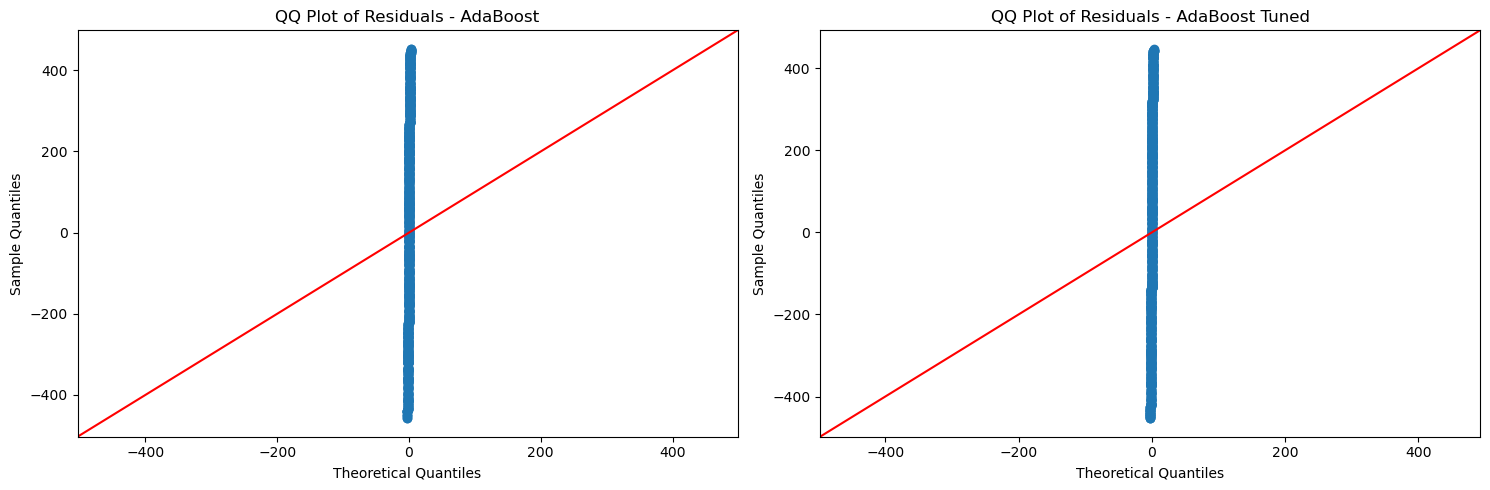

In [74]:
y_test_res_tuned = y_test - y_pred_test_tuned

residuals = [('AdaBoost', y_test_res_ada),
             ('AdaBoost Tuned', y_test_res_tuned)
]

fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes = axes.flatten()

for idx, (name, res) in enumerate(residuals):
    # Display QQ plot
    sm.qqplot(res, line ='45', ax=axes[idx])
    axes[idx].set_title(f'QQ Plot of Residuals - {name}')

plt.tight_layout()
plt.show()

**Insight:**  
Masih sama dengan QQ Plot sebelumnya dimana model menunjukkan pola vertikal yang terkonsentrasi disekitar 0, ini menunjukkan bahwa variasi residual sangat kecil dan menandakan kurangnya variasi prediksi atau masalah pada data.

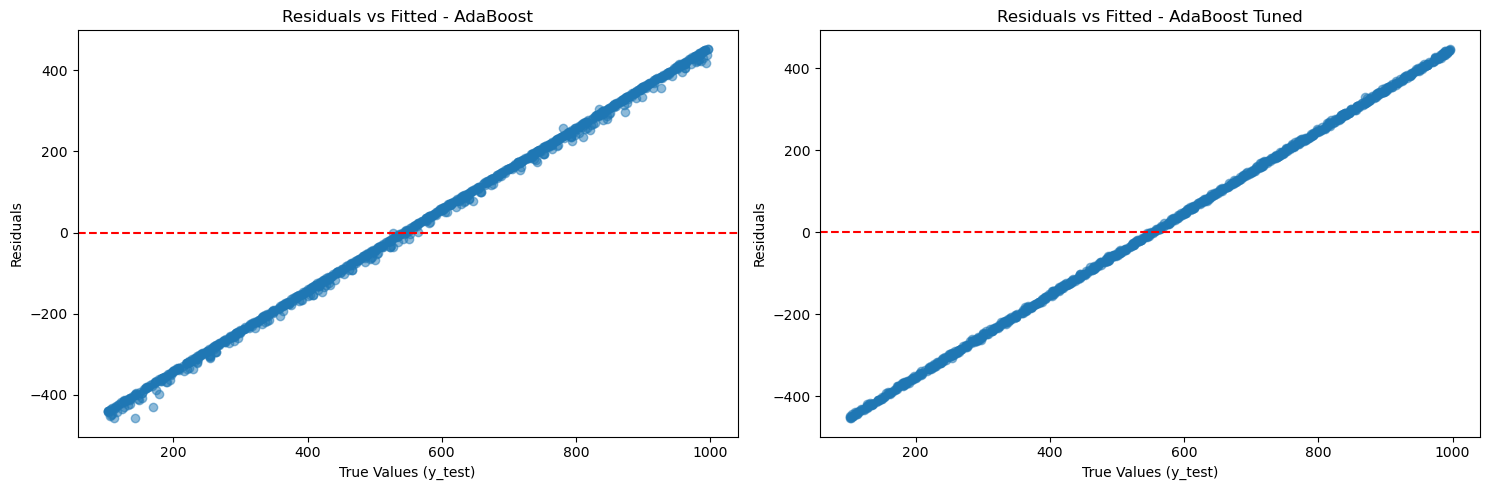

In [75]:
residuals = [('AdaBoost', y_test_res_ada),
             ('AdaBoost Tuned', y_test_res_tuned)
]

fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes = axes.flatten()

for idx, (name, res) in enumerate(residuals):
    # Display scatter plot untuk homoskedastisitas
    axes[idx].scatter(y_test, res, alpha=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--')  # Garis horizontal di y=0
    axes[idx].set_title(f'Residuals vs Fitted - {name}')
    axes[idx].set_xlabel('True Values (y_test)')
    axes[idx].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

**Insight:**
### Polanya sangat mirip di kedua plot
Baik pada AdaBoost default maupun tuned, residual tersebar simetris di sepanjang garis yang membentuk pola diagonal. Kalau dilihat, AdaBoost Tuned hanya terlihat lebih `rapat` dibanding AdaBoost default. Dari hasil ini tidak dapat ditentukan mana yang jelas lebih baik karena keduanya masih menunjukkan pola residual yang terstruktur.

# Bab 9 - Model Saving

Saya save model untuk melakukan model_inf

In [76]:
# Save the best model
with open('pipe_ada.pkl', 'wb') as model_file:
  pickle.dump(pipe_ada, model_file)

# Bab 10 - Model Inference

Model inference dilakukan pada notebook P1M2_ade_indra_inf.ipynb

# Bab 11 - Pengambilan Kesimpulan

## Kesimpulan

Hasil akhir dari model `AdaBoost Regressor` mampu memprediksi pembakaran kalori dengan metrics evaluasi Mean Absolute Erroe (MAE) kurang lebih sebesar `225`, dimana jika hasil yang ditampilkan saat prediksi data sebesar 500 kalori pembakaran, maka data aktual nya berkisar antara 275-725 kalori. Untuk konteks aplikasi fitness dalam memprediksi pembakaran kalori, kesalahan (225) cukup signigikan sehingga model ini menunjukkan hasil underfit dan tidak cukup menangkap pola kompleks dari data pengguna. Dari hasil metrics evaluasi QQ Plot model juga tidak menunjukkan hasil yang normal, didapatkan pola vertikal yang terkonsentrasi disekitar 0 yang menandakan variasi residual sangat kecil. Pengecekan Homoscedasticity juga menunjukkan bahwa residuals tidak menyebar secara acak di sekitar garis nol, malah membentuk pola linear yang sangat teratur. Biasanya residual yang baik harus menyebar secara acak tanpa pola tertentu, sehingga kemungkinan data yang digunakan pada modeling kali ini belum cukup baik digunakan untuk memprediksi hasil pembakaran kalori.

## Further Improvement

- Model masih memiliki error yang sangat tinggi untuk aplikasi pembakaran kalori yang jika dilakukan deployment untuk customer dapat menurunkan kepercayaan. Maka perlu perluasan dataset yang lebih banyak lagi seperti fitur heart rate, durasi latihan, body composition dll.
- Model saat ini bisa dijadikan sebagai baseline dimana dapat dilanjutkan untuk melakukan Hyperparameter tuning lebih lanjut, melakukan eksperimen lain dengan model (misalnya Gradient Boosting, XGBoost, Neural Networks), atau melakukan feature engineering kembali.
- Jika model ingin dilakukan percobaan deployment, dapat diberikan disclaimer bahwa "Prediksi kalori adalah estimasi, akurasi masih dalam pengembangan"
- Dapat dilakukan segmentasi dalam hasil prediksi daripada mencoba prediksi angka yang presisi seperti memberi kategori (misalnya "rendah", "sedang", "tinggi" pembakaran kalori).